In [6]:
import matplotlib.pyplot as plt
import numpy as np
from shapely.creation import points


def bresenham_points_x(x1, y1, x2, y2):
    result = list()
    dx = x2 - x1
    dy = y2 - y1
    y_step, dy = (1, dy) if dy >= 0 else (-1, -dy)
    yi = y1
    di = 2 * dy - dx
    for xi in range(x1, x2):
        result.append([xi, yi])
        if di > 0:
            yi += y_step
            di += 2 * (dy - dx)
        else:
            di += 2 * dy
    return np.array(result)


def bresenham_points_y(x1, y1, x2, y2):
    result = list()
    dx = x2 - x1
    dy = y2 - y1
    x_step, dx = (1, dx) if dx >= 0 else (-1, -dx)
    xi = x1
    di = 2 * dx - dy
    for yi in range(y1, y2):
        result.append([xi, yi])
        if di > 0:
            xi += x_step
            di += 2 * (dx - dy)
        else:
            di += 2 * dx
    return np.array(result)


def bresenham_points(x1, y1, x2, y2):
    if abs(y2 - y1) < abs(x2 - x1):
        if x1 < x2:
            return bresenham_points_x(x1, y1, x2, y2)
        else:
            return bresenham_points_x(x2, y2, x1, y1)
    else:
        if y1 < y2:
            return bresenham_points_y(x1, y1, x2, y2)
        else:
            return bresenham_points_y(x2, y2, x1, y1)

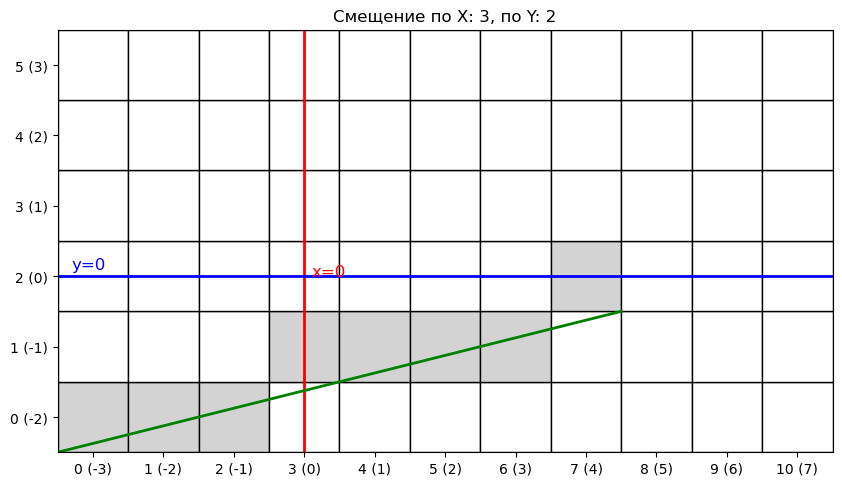

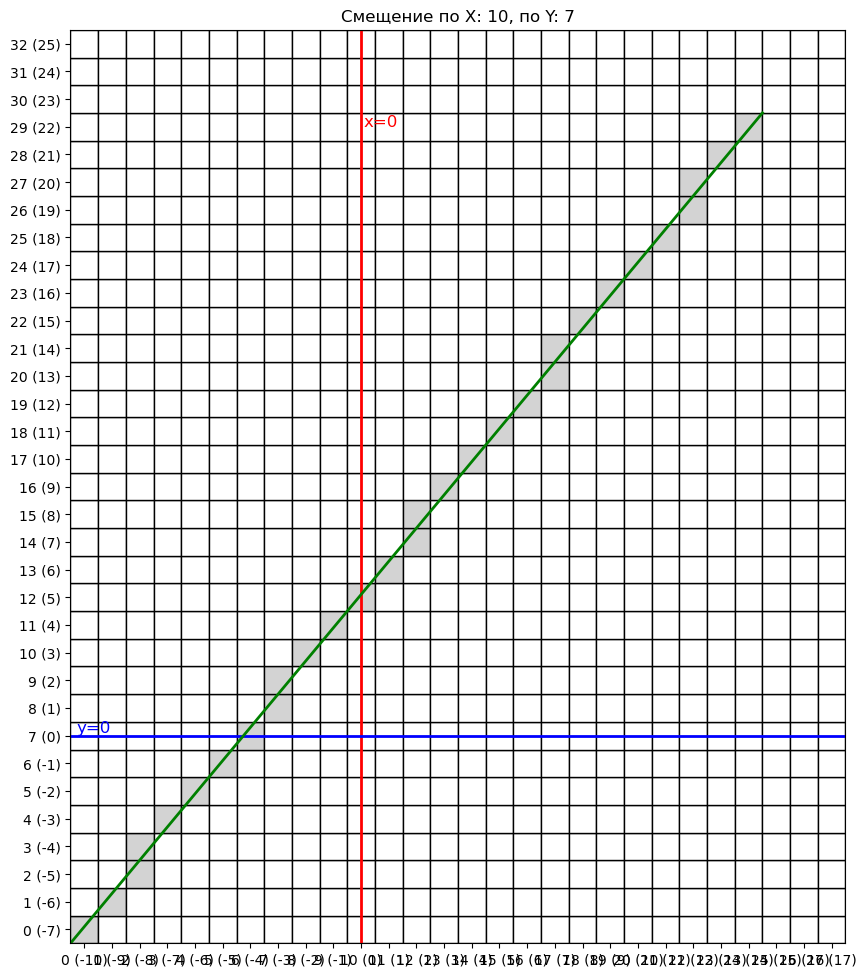

In [7]:
def plot_segment(x1, y1, x2, y2, raster_func=bresenham_points):
    points = raster_func(x1, y1, x2, y2)
    # Найдём смещения, если есть отрицательные координаты
    shift_x = -min(points[:, 0]) if np.min(points[:, 0]) < 0 else 0
    shift_y = -min(points[:, 1]) if np.min(points[:, 1]) < 0 else 0

    shifted_points = points + np.array([shift_x, shift_y])
    width = np.max(shifted_points[:, 0]) + 1
    height = np.max(shifted_points[:, 1]) + 1

    fig, ax = plt.subplots(figsize=(10, 15))
    ax.set_xlim(0, width + 3)
    ax.set_ylim(0, height + 3)
    ax.set_aspect('equal')

    # Рисуем сетку и отмечаем пиксели отрезка
    for y in range(height + 3):
        for x in range(width + 3):
            rect = plt.Rectangle((x, y), 1, 1,
                                 facecolor='lightgray' if [x, y] in shifted_points.tolist() else 'white',
                                 edgecolor='black')
            ax.add_patch(rect)

    x0_center = shift_x + 0.5
    y0_center = shift_y + 0.5

    if 0 < shift_x < width:
        ax.axvline(x=x0_center, color='red', linewidth=2)
        ax.text(x0_center + 0.1, height - 0.5, "x=0", color='red', fontsize=12)

    if 0 < shift_y < height:
        ax.axhline(y=y0_center, color='blue', linewidth=2)
        ax.text(0.2, y0_center + 0.1, "y=0", color='blue', fontsize=12)

    # Подписи осей
    ax.set_xticks(np.arange(0.5, width + 3.5))
    ax.set_yticks(np.arange(0.5, height + 3.5))
    ax.plot([x1 + shift_x , x2 + shift_x ], [y1 + shift_y, y2 + shift_y ], color='green',
            linewidth=2)
    if shift_x != 0:
        ax.set_xticklabels([f"{x} ({x - shift_x})" for x in range(width + 3)])
    else:
        ax.set_xticklabels([x for x in range(width + 3)])

    if shift_y != 0:
        ax.set_yticklabels([f"{y} ({y - shift_y})" for y in range(height + 3)])
    else:
        ax.set_yticklabels([y for y in range(height + 3)])

    plt.title(f"Смещение по X: {shift_x}, по Y: {shift_y}" if shift_x or shift_y else "Без смещения")
    plt.grid(False)
    plt.show()


plot_segment(-3, -2, 5, 0)
plot_segment(-10, -7, 15, 23)

In [8]:
def naive_points_x(x1, y1, x2, y2):
    result = list()
    k = (y2 - y1) / (x2 - x1)
    for xi in range(x1, x2):
        result.append([xi, round(k * (xi - x1) + y1)])
    return np.array(result)


def naive_points_y(x1, y1, x2, y2):
    result = list()
    k = (x2 - x1) / (y2 - y1)
    for yi in range(y1, y2):
        result.append([round(k * (yi - y1) + x1), yi])
    return np.array(result)


def naive_points(x1, y1, x2, y2):
    if abs(y2 - y1) < abs(x2 - x1):
        if x1 < x2:
            return naive_points_x(x1, y1, x2, y2)
        else:
            return naive_points_x(x2, y2, x1, y1)
    else:
        if y1 < y2:
            return naive_points_y(x1, y1, x2, y2)
        else:
            return naive_points_y(x2, y2, x1, y1)

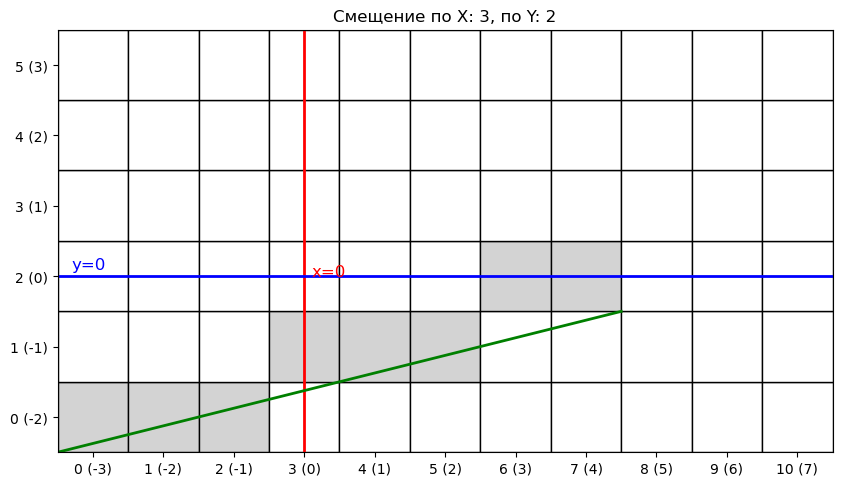

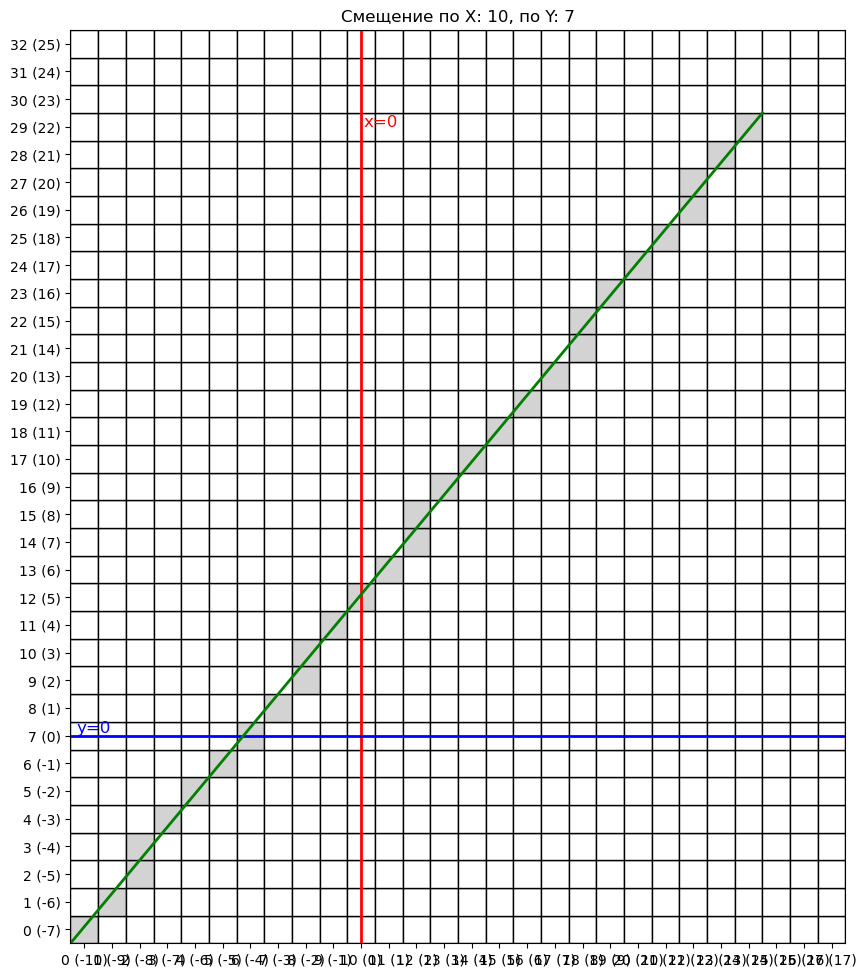

In [9]:
plot_segment(-3, -2, 5, 0, raster_func=naive_points)
plot_segment(-10, -7, 15, 23, raster_func=naive_points)

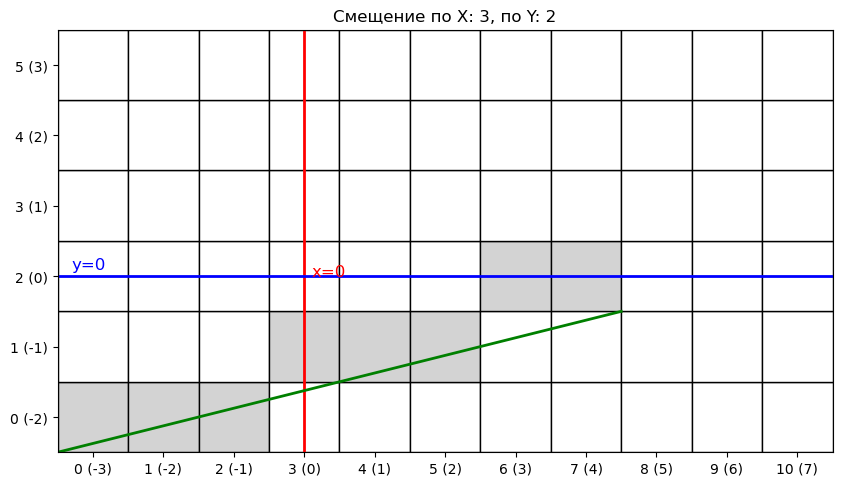

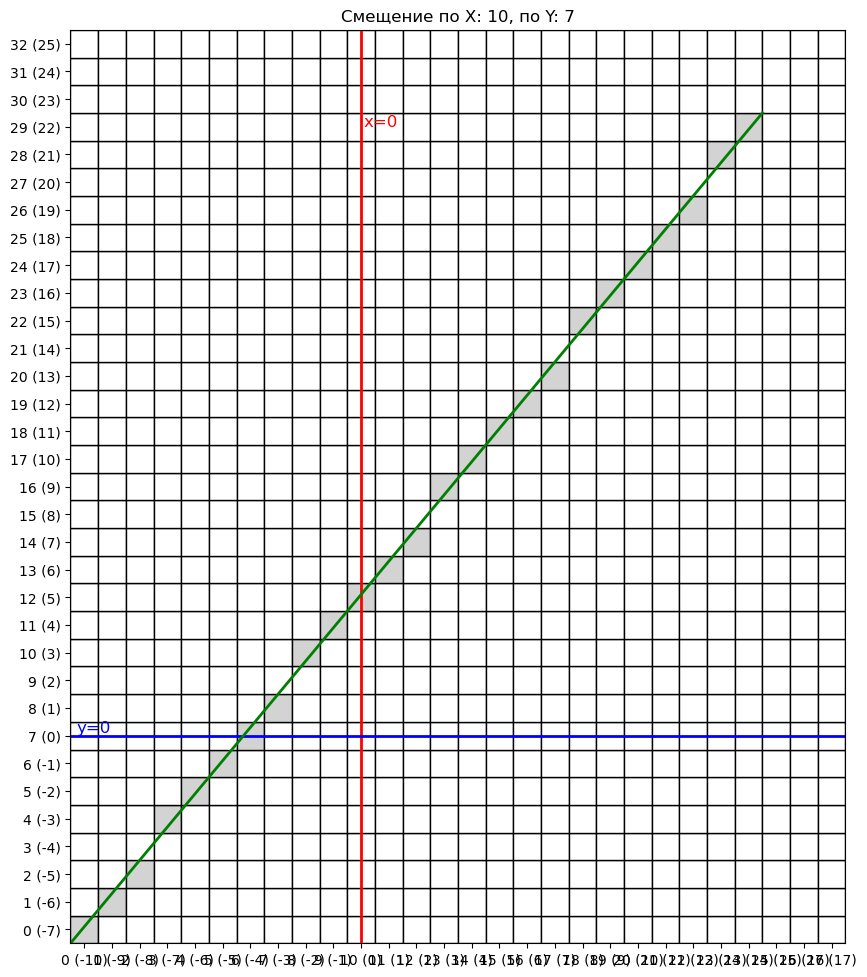

In [10]:
def very_naive_points_x(x1, y1, x2, y2):
    result = list()
    k = (y2 - y1) / (x2 - x1)
    for xi in range(x1, x2 + 1):
        result.append([xi, round(k * (xi - x1) + y1)])
    return np.array(result)


def very_naive_points(x1, y1, x2, y2):
    if x1 < x2:
        return naive_points_x(x1, y1, x2, y2)
    else:
        return naive_points_x(x2, y2, x1, y1)
    
plot_segment(-3, -2, 5, 0, raster_func=very_naive_points)
plot_segment(-10, -7, 15, 23, raster_func=very_naive_points)